# Em construção...

Os círculos roxos são chamados de nós e as linhas pretas que os ligam, de ramos. Os nós que não tem descendentes (com borda laranja na imagem) são chamados de folhas e o primeiro nó (com borda verde) é chamado de raiz. Juntos, os nós e ramos formam uma árvore.

Para transformar isso em uma árvore de decisão, imaginamos que a raiz representa o dataset inteiro e que cada ramo representa uma decisão. No exemplo dado na seção anterior, a raiz poderia representar todas as pessoas possíveis junto com a pergunta “Qual o gênero?”. A aresta saindo da raiz e indo para a esquerda poderia então representar a resposta “feminino” e o da direita, “masculino”, de modo que o nó da esquerda representaria o conjunto de mulheres e o da direita, o conjunto de homens. Os outros nós e ramos corresponderiam então a outras perguntas e as folhas dariam a classificação final (qual é a pessoa correta).


O número total de perguntas feitas nesse processo é chamado de profundidade (ou altura) dessa árvore. No caso da figura acima, temos uma árvore de profundidade 3: precisamos de 3 ramos (3 perguntas) para ir da raiz até as folhas. Note que isso corresponde a altura geométrica dessa árvore.


Ao longo desse processo, você pode ter percebido que uma árvore é formada de várias sub-árvores. Por exemplo, se olharmos apenas para o nó à direita da raiz e para os nós abaixo dele, temos uma sub-árvore, identificada pela circunferência tracejada. Do lado esquerdo, temos outro exemplo de sub-árvore.

#### Certo, mas como construo uma árvore de decisão?


Vamos pensar novamente no jogo que foi descrito, em que desejamos descobrir uma face. Se quisermos encontrar a solução da maneira mais rápida, as melhores perguntas a se fazer são aquelas que melhor dividem o seu conjunto de possibilidades de resposta, de forma a otimizar a eliminação das faces possíveis. Isso corresponderia a tentar separar o seu conjunto exatamente no meio.


Por exemplo, se metade dos indivíduos possuírem cabelo escuro, e a outra metade não, a melhor alternativa seria perguntar se a pessoa em questão tem cabelo escuro, para eliminar uma grande parte das respostas de uma só vez.
Tendo feito essa divisão, procuramos a pergunta ótima para o conjunto gerado, isto é, repetimos o processo, até descobrirmos a face.

Para um dataset, o processo é similar. As perguntas são feitas a respeito dos valores das features. E o processo é realizado para todo conjunto de dados gerado pelas divisões. Termina quando todos os caminhos fornecem classificação.

Note que as árvores crescem em tamanho máximo nesse processo. Para melhorar a capacidade de generalização de dados não vistos aplicamos um processo de poda (que será visto melhor no final do post).
O algoritmo pode ser representado pelo que segue:

#### Como funciona o algoritmo?

1. Verifique qual atributo fornece o melhor corte
2. Crie um nó contendo esse atributo
3. Repita o mesmo para os subconjuntos até todos fornecerem um resultado

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2021-03-17 07:19:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolvendo cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Conectando-se a cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 5827 (5,7K) [text/csv]
Salvando em: “drug200.csv”

drug200.csv         100%[===================>]   5,69K  --.-KB/s    em 0s      

2021-03-17 07:19:35 (366 MB/s) - “drug200.csv” salvo [5827/5827]



In [71]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [72]:
my_data.shape

(200, 6)

In [73]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Como você pode perceber, alguns recursos neste conjunto de dados são categóricos, como **Sexo** ou **BP**. Infelizmente, as árvores de decisão do Sklearn não lidam com variáveis categóricas. Mas ainda podemos converter esses recursos em valores numéricos. **pandas.get_dummies ()**
Converta variáveis categóricas em variáveis dummy / indicadoras.

In [74]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

Agora train_test_split retornará 4 parâmetros diferentes. Vamos nomeá-los:
X_trainset, X_testset, y_trainset, y_testset

O train_test_split precisará dos parâmetros:
X, y, test_size = 0.3 e random_state = 3.

O X e y são os arrays necessários antes da divisão, o test_size representa a proporção do conjunto de dados de teste e o random_state garante que obteremos as mesmas divisões.

In [77]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [78]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
predTree = drugTree.predict(X_testset)

Você pode imprimir <b> predTree </b> e <b> y_testset </b> se quiser comparar visualmente a previsão com os valores reais.

In [81]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id = "avaliação">
     <h2> Avaliação </h2>
     A seguir, vamos importar <b> métricas </b> do sklearn e verificar a precisão do nosso modelo.
</div>

In [84]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", round(metrics.accuracy_score(y_testset, predTree),2))

DecisionTrees's Accuracy:  0.98


A pontuação da classificação de precisão calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto de rótulos correspondente em y_true.

Na classificação multilabel, a função retorna a precisão do subconjunto. Se todo o conjunto de rótulos previstos para uma amostra corresponder estritamente ao conjunto verdadeiro de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.

<hr>

<div id = "visualization">
     <h2> Visualização </h2>
    
    
Vamos visualizar a árvore
</div>

In [36]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

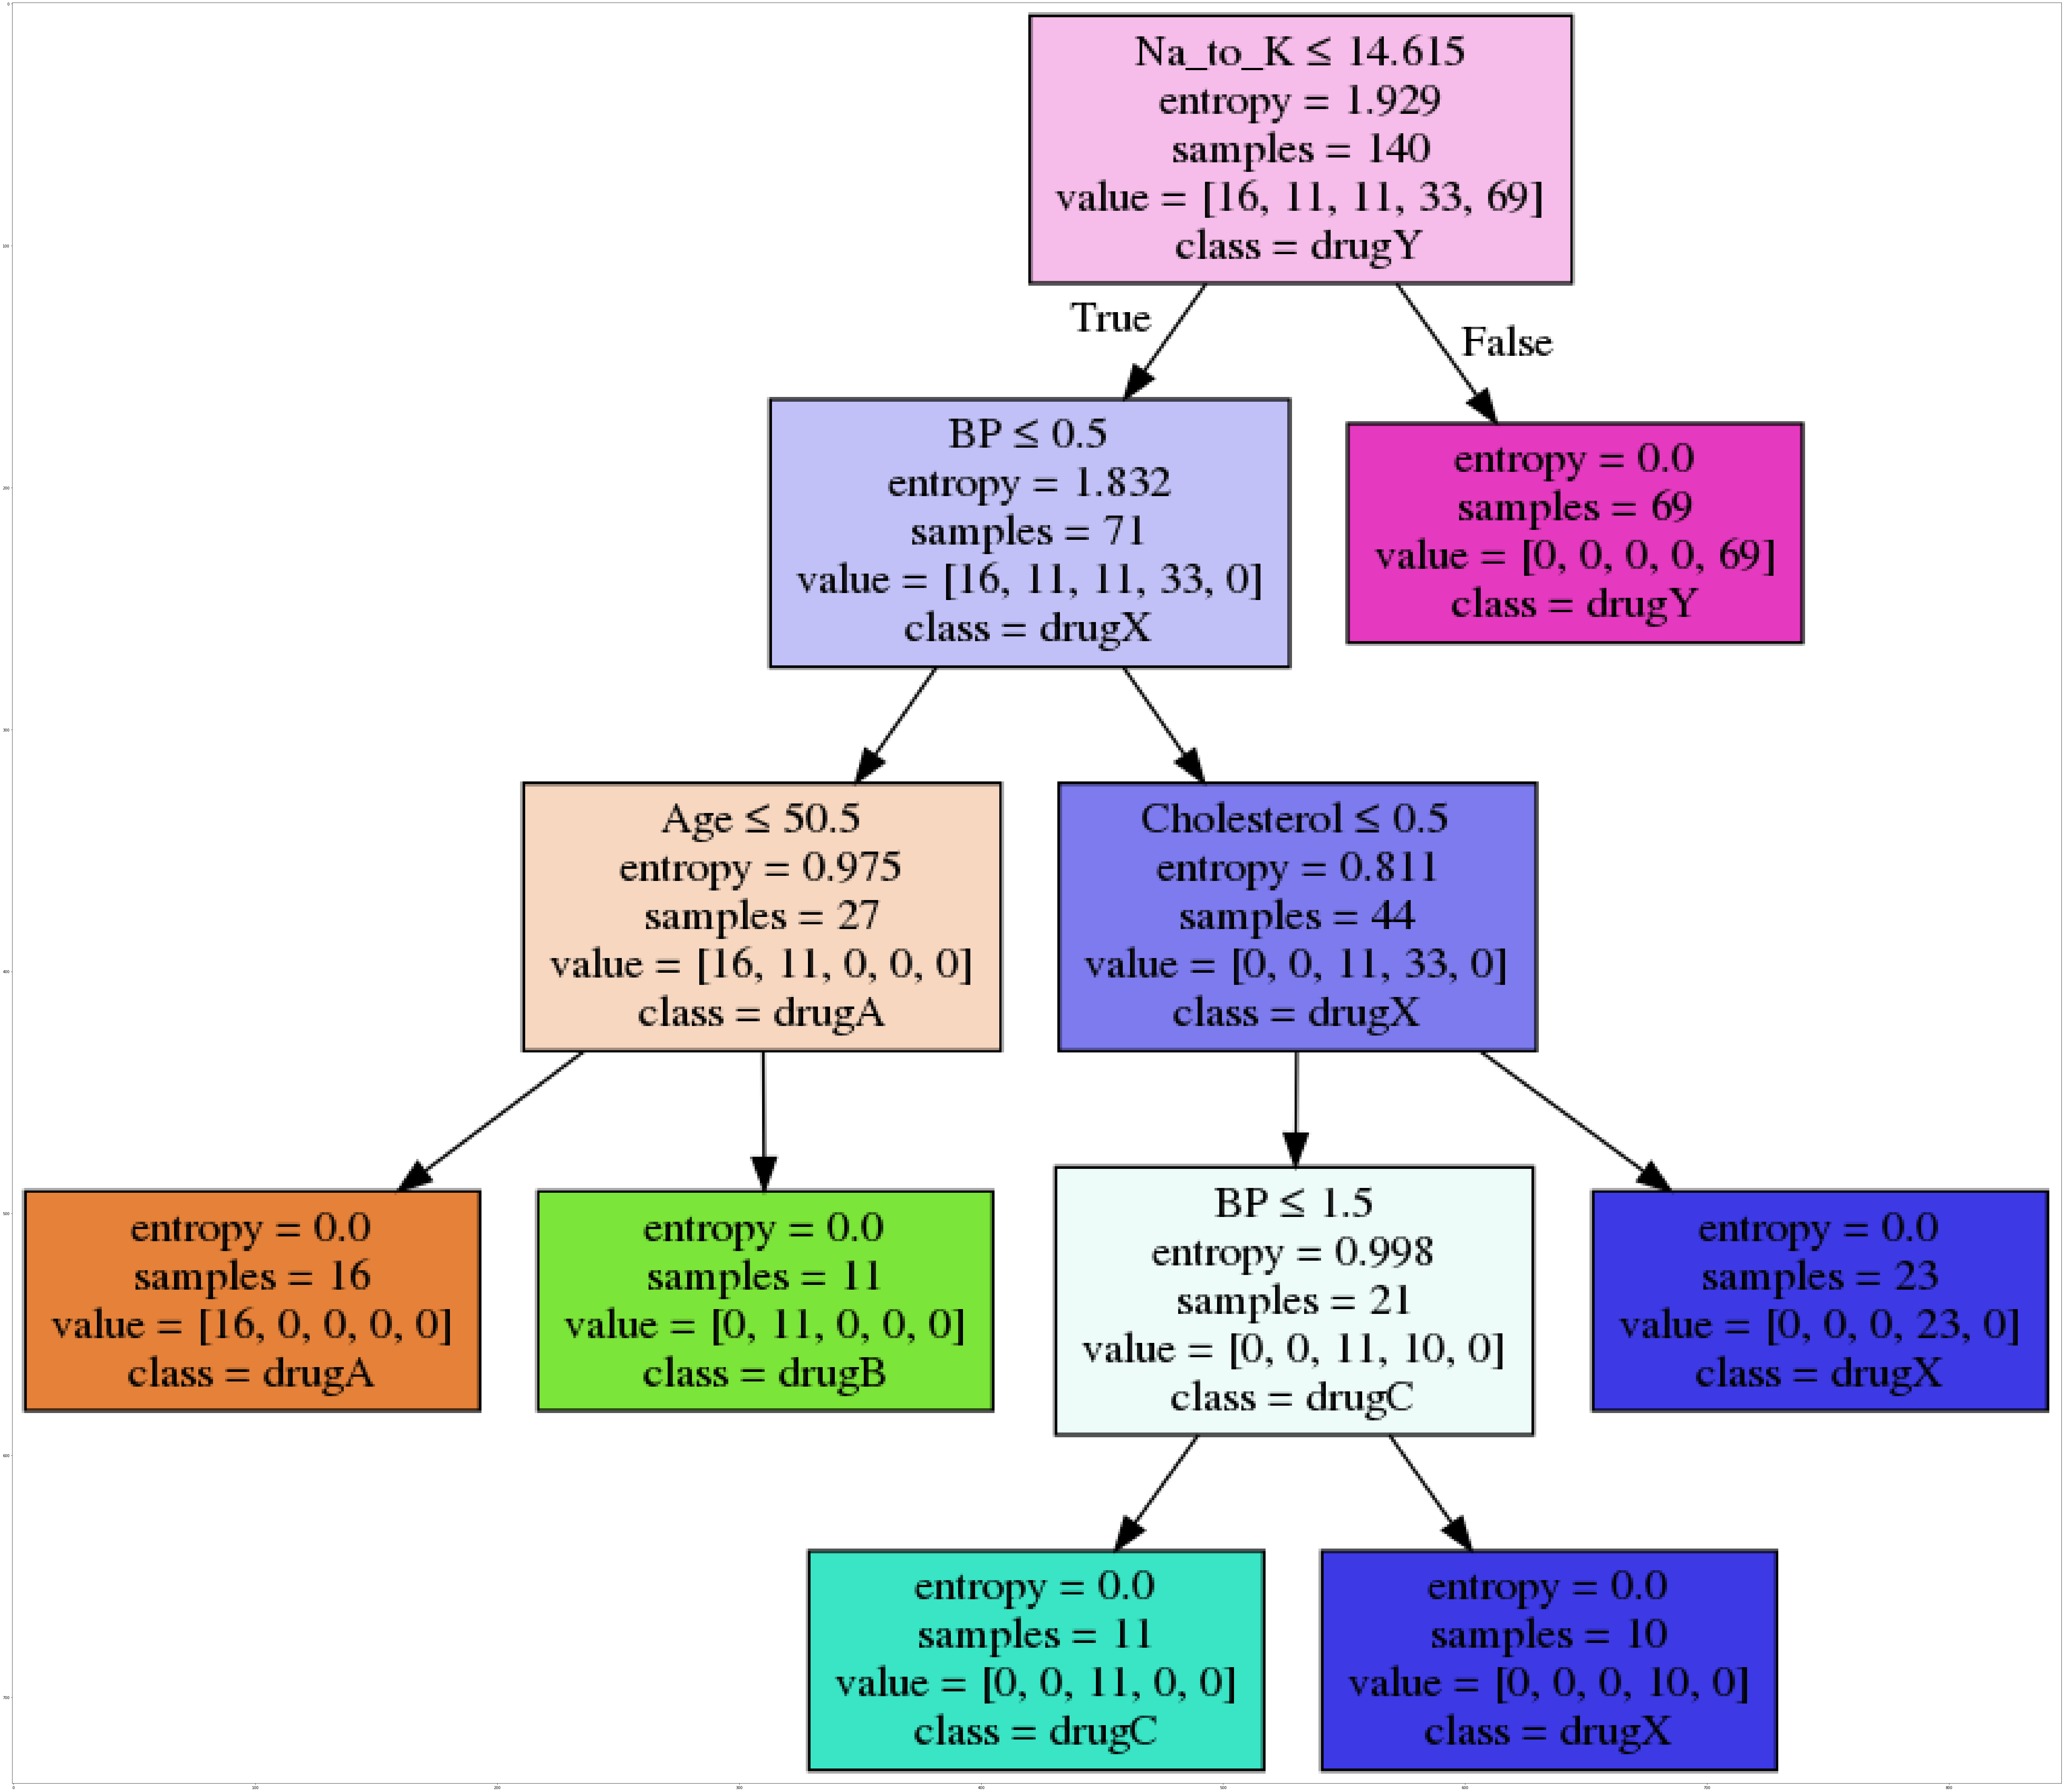

In [37]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Entendendo as Métricas

### Entropia (aleatoriedade)

A entropia de um dataset é uma métrica da sua incerteza ou impureza, ou seja, representa a aleatoriedade em seus valores. O seu valor é zero quando não há aleatoriedade (todos os elementos do dataset tem a mesma classificação) e aumenta conforme o dataset fica mais impuro.


Considere, por exemplo, o caso da figura abaixo, em que há duas classes de elementos: as estrelas e os pentágonos. O dataset (a) é “impuro”, pois tem vários elementos de formas distintas. Já o dataset (b) é bem mais puro, pois quase todos os seus elementos têm a mesma forma (só há um pentágono). O caso extremo seria um dataset que só tivesse estrelas (ou, alternativamente, que só tivesse pentágonos). Nesse caso, o dataset seria completamente puro e sua entropia seria zero.


 Quanto menor for a entropia, melhor.

## Overfiting

Esse é o grande problema em todos os algoritmos de aprendizado! No caso de árvores de decisão ele surge quando a árvore se torna hiper específica para o dataset, perdendo portanto o poder de generalização em outros dados. Ou seja, conforme vamos aumentando demais o número de nós na árvore, a acurácia cresce na base de treino, mas piora na base de teste.



Para resolver esse problema recorremos as seguintes questões:
- Como detectar atributos (ou cortes) irrelevantes?
- Quais cortes valem a pena e quais têm maior probabilidade de causar overfitting?

#### Pruning

Pruning consiste em podar uma árvore de decisão já treinada, em uma tentativa de diminuir o número de nós e, portanto, o overfitting. A forma mais simples de fazer isso é pelo método do erro reduzido. Esse método passa por cada nó da árvore e:
Transforma o nó em uma folha cuja classe é a mais comum no nó (dentre as observações da base de treinamento que se encaixam no nó). A sub-árvore abaixo desse nó é removida.
Verifica a acurácia da nova árvore em um conjunto de validação.


Se a acurácia do modelo não tiver diminuído, a nova árvore é mantida. Caso contrário, voltamos para a árvore antiga.

#### Hiperparâmetros

Quando a árvore está sendo treinada, é possível que alguma folha tenha apenas uma observação associada, o que pode levar a overfitting (a classe daquela folha é determinada por apenas uma observação).

No sklearn, podemos usar os hiperparâmetros min_samples_split e min_samples_leaf para controlar isso. O primeiro garante que um corte só seja feito em nós com no mínimo min_samples_split observações. No entanto, mesmo que esse número seja alto, é possível que alguma das folhas geradas por esse corte tenham um número muito baixo de observações.


Para resolver isso, podemos usar min_samples_leaf, que determina o número mínimo de observações que cada folha deve ter (se um corte fosse criar uma folha com menos observações, ele não será feito).
Além disso, podemos usar também max_depth para controlar a profundidade máxima da árvore.

## Grid Search

Mas então, como definir quais os melhores valores? Uma das técnicas que pode ser utilizada para isso é o Grid Search CV. Você passa para ele uma lista de possíveis valores e o score usado para medir a eficiência do modelo, ele vai rodar o Cross Validation com todas as possíveis combinações e no final vai te dizer qual a combinação apresentou o melhor score.

In [85]:
from sklearn.model_selection import GridSearchCV


ImportError: cannot import name 'GridSearch'

In [44]:
param_grid = {
            "criterion": ['entropy', 'gini'],
            "max_depth": [3, 5, 6]
}

grid_search = GridSearchCV(drugTree, param_grid, scoring="accuracy")
grid_search.fit(X, y)

/home/anderson/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/anderson/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
result = grid_search.best_estimator_ 
grid_search.best_params_, grid_search.best_score_

({'criterion': 'entropy', 'max_depth': 5}, 0.99)